In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

## Running a simple bootstrap
We will work through an example where we learn to run a simple bootstrap. As we saw in the video, the main idea behind bootstrapping is sampling with replacement.

Suppose our own a factory that produces wrenches. We want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, We have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

In [3]:
wrench_lengths=np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

C:\Users\lfc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


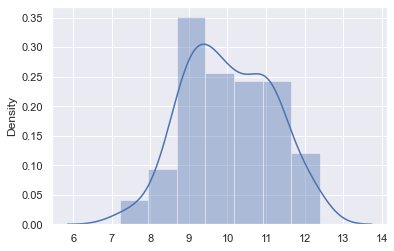

In [24]:
sns.distplot(wrench_lengths)
plt.show()

In [26]:
boot_95_ci = np.percentile(wrench_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.0311205740865, 95% CI = [ 8.04389409 12.19683668]


In [22]:
# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = temp_sample.mean()
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.0311205740865, 95% CI = [ 9.79270795 10.24929286]


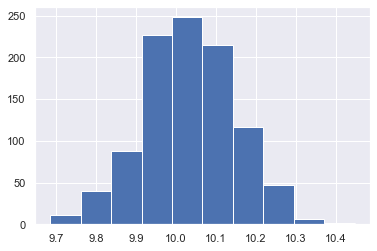

In [23]:
plt.hist(mean_lengths)
plt.show()

## Non-standard estimators
Above, we ran a simple bootstrap that we will now modify for more complicated estimators.

Suppose we are studying the health of students. we are given the height and weight of 1000 students and are interested in the median height as well as the correlation between height and weight and the associated 95% CI for these quantities. Let's use bootstrapping.

Examine the pandas DataFrame df with the heights and weights of 1000 students. Using this, calculate the 95% CI for both the median height as well as the correlation between height and weight.

In [36]:
df = pd.read_csv('height_vs_weight.csv')

In [55]:
df.head()

,heights,weights
0,3.328739,97.785171
1,7.494691,276.504049
2,6.065957,230.262258
3,2.487411,62.074851
4,4.342799,163.870440


In [54]:
# Sample with replacement and calculate quantities of interest
sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=len(df), replace=True)
    height_medians.append(df.heights.median())
    hw_corr.append(tmp_df.weights.corr(tmp_df.heights))

# Calculate confidence intervals
height_median_ci = np.percentile(height_medians , [2.5,97.5])
height_weight_corr_ci = np.percentile(hw_corr , [2.5,97.5])
print("Height Median CI = {} \nHeight Weight Correlation CI = {}".format( height_median_ci, height_weight_corr_ci))

Height Median CI = [5.41762889 5.41762889] 
Height Weight Correlation CI = [0.9380055  0.95148468]
